## Mean Reversion - (Pairs Trading)

- Long Pair: Long stock A and short stock B
- Short Pair: Short stock A and long stock B
Want to find a high correlation between stock A and B's price (usually c > 0.8.) If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behaviour. Once the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form

#### Basic Idea
1) Find 2 assets that move similarly with eachother
2) sell the overvalued stock and buy the undervalued stock
    - A common signal to use to trigger the purchase of a pair trade is to use price ratio. If the ratio changes significantly, then you know it is time to trade. Significance is measured with standard deviation

In [19]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 4, 24), end=datetime(2021, 4, 24)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ['DPZ', 'AAPL', 'GOOG', 'MSFT', 'AMD', 'GME', 'SPY', 'NFLX', 'BABA', 'BA', 'TSLA', 'WMT', 'X', 'GS', 'XOM', 'NKE', 'META', 'BRK-B']
d = get_historical_data(ticks)
print(d.shape)
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

(252, 18)


,DPZ,AAPL,GOOG,MSFT,AMD,GME,SPY,NFLX,BABA,BA,TSLA,WMT,X,GS,XOM,NKE,META,BRK-B
Date,,,,,,,,,,,,,,,,,,
2021-04-19,380.496429,132.050995,114.707848,251.180573,81.110001,41.092499,393.424561,554.440002,226.737991,244.149994,238.210007,44.110420,22.297316,312.102753,49.068493,126.610153,301.089874,270.279999
2021-04-20,380.582489,130.356781,114.270912,250.714615,79.269997,39.632500,390.544067,549.570007,222.005844,234.059998,239.663330,44.451408,20.959869,301.905212,48.034634,121.395569,301.498291,267.890015
2021-04-21,377.475098,130.738724,114.253967,252.966782,81.610001,39.627499,394.239441,508.899994,221.580902,235.919998,248.039993,44.580860,21.877531,304.989014,48.651474,124.060135,300.322784,272.209991
2021-04-22,381.261322,129.210983,112.990021,249.656448,79.059998,37.792500,390.638885,508.779999,221.494003,234.330002,239.896667,44.097794,21.740860,300.968231,48.017273,123.372505,295.391602,269.510010
2021-04-23,380.257324,131.541763,115.350533,253.520157,82.760002,37.794998,394.874237,505.549988,224.130478,238.380005,243.133331,44.170406,23.146645,308.700500,48.277905,124.337097,299.984070,271.980011


In [20]:
# Correlation Matrix
corr_mtrx = d.corr()
corr_mtrx

,DPZ,AAPL,GOOG,MSFT,AMD,GME,SPY,NFLX,BABA,BA,TSLA,WMT,X,GS,XOM,NKE,META,BRK-B
DPZ,1.000000,0.215169,-0.207343,0.049852,0.265336,-0.363020,-0.043569,0.189883,0.552802,-0.195480,-0.052095,0.335647,-0.311682,-0.339183,-0.553838,0.024097,0.306881,-0.072372
AAPL,0.215169,1.000000,0.765563,0.868948,0.918794,0.449900,0.897570,0.861139,0.503278,0.649297,0.905050,0.798448,0.663020,0.673259,0.250475,0.889708,0.860029,0.840687
GOOG,-0.207343,0.765563,1.000000,0.925449,0.585081,0.743687,0.950758,0.715588,0.053546,0.844313,0.849602,0.497455,0.880126,0.933780,0.720093,0.775796,0.737040,0.925402
MSFT,0.049852,0.868948,0.925449,1.000000,0.672401,0.672505,0.939998,0.859247,0.278224,0.766547,0.842084,0.555514,0.746239,0.833535,0.546216,0.764256,0.830619,0.887630
AMD,0.265336,0.918794,0.585081,0.672401,1.000000,0.243387,0.760382,0.736988,0.572781,0.492571,0.808537,0.864122,0.535553,0.488650,0.053716,0.849127,0.755683,0.725688
GME,-0.363020,0.449900,0.743687,0.672505,0.243387,1.000000,0.679288,0.428684,-0.177824,0.663475,0.583298,0.116061,0.745398,0.801194,0.746583,0.479506,0.438879,0.704577
SPY,-0.043569,0.897570,0.950758,0.939998,0.760382,0.679288,1.000000,0.792810,0.211184,0.860000,0.927627,0.652183,0.881494,0.906785,0.594242,0.890021,0.823235,0.968449
NFLX,0.189883,0.861139,0.715588,0.859247,0.736988,0.428684,0.792810,1.000000,0.485541,0.563172,0.796210,0.635886,0.554715,0.628058,0.275218,0.721957,0.742170,0.700613
BABA,0.552802,0.503278,0.053546,0.278224,0.572781,-0.177824,0.211184,0.485541,1.000000,-0.073451,0.236213,0.610548,-0.162641,-0.135558,-0.522950,0.383316,0.515564,0.181715
BA,-0.195480,0.649297,0.844313,0.766547,0.492571,0.663475,0.860000,0.563172,-0.073451,1.000000,0.738579,0.381063,0.870614,0.872979,0.732941,0.717081,0.644235,0.824197


<AxesSubplot:>

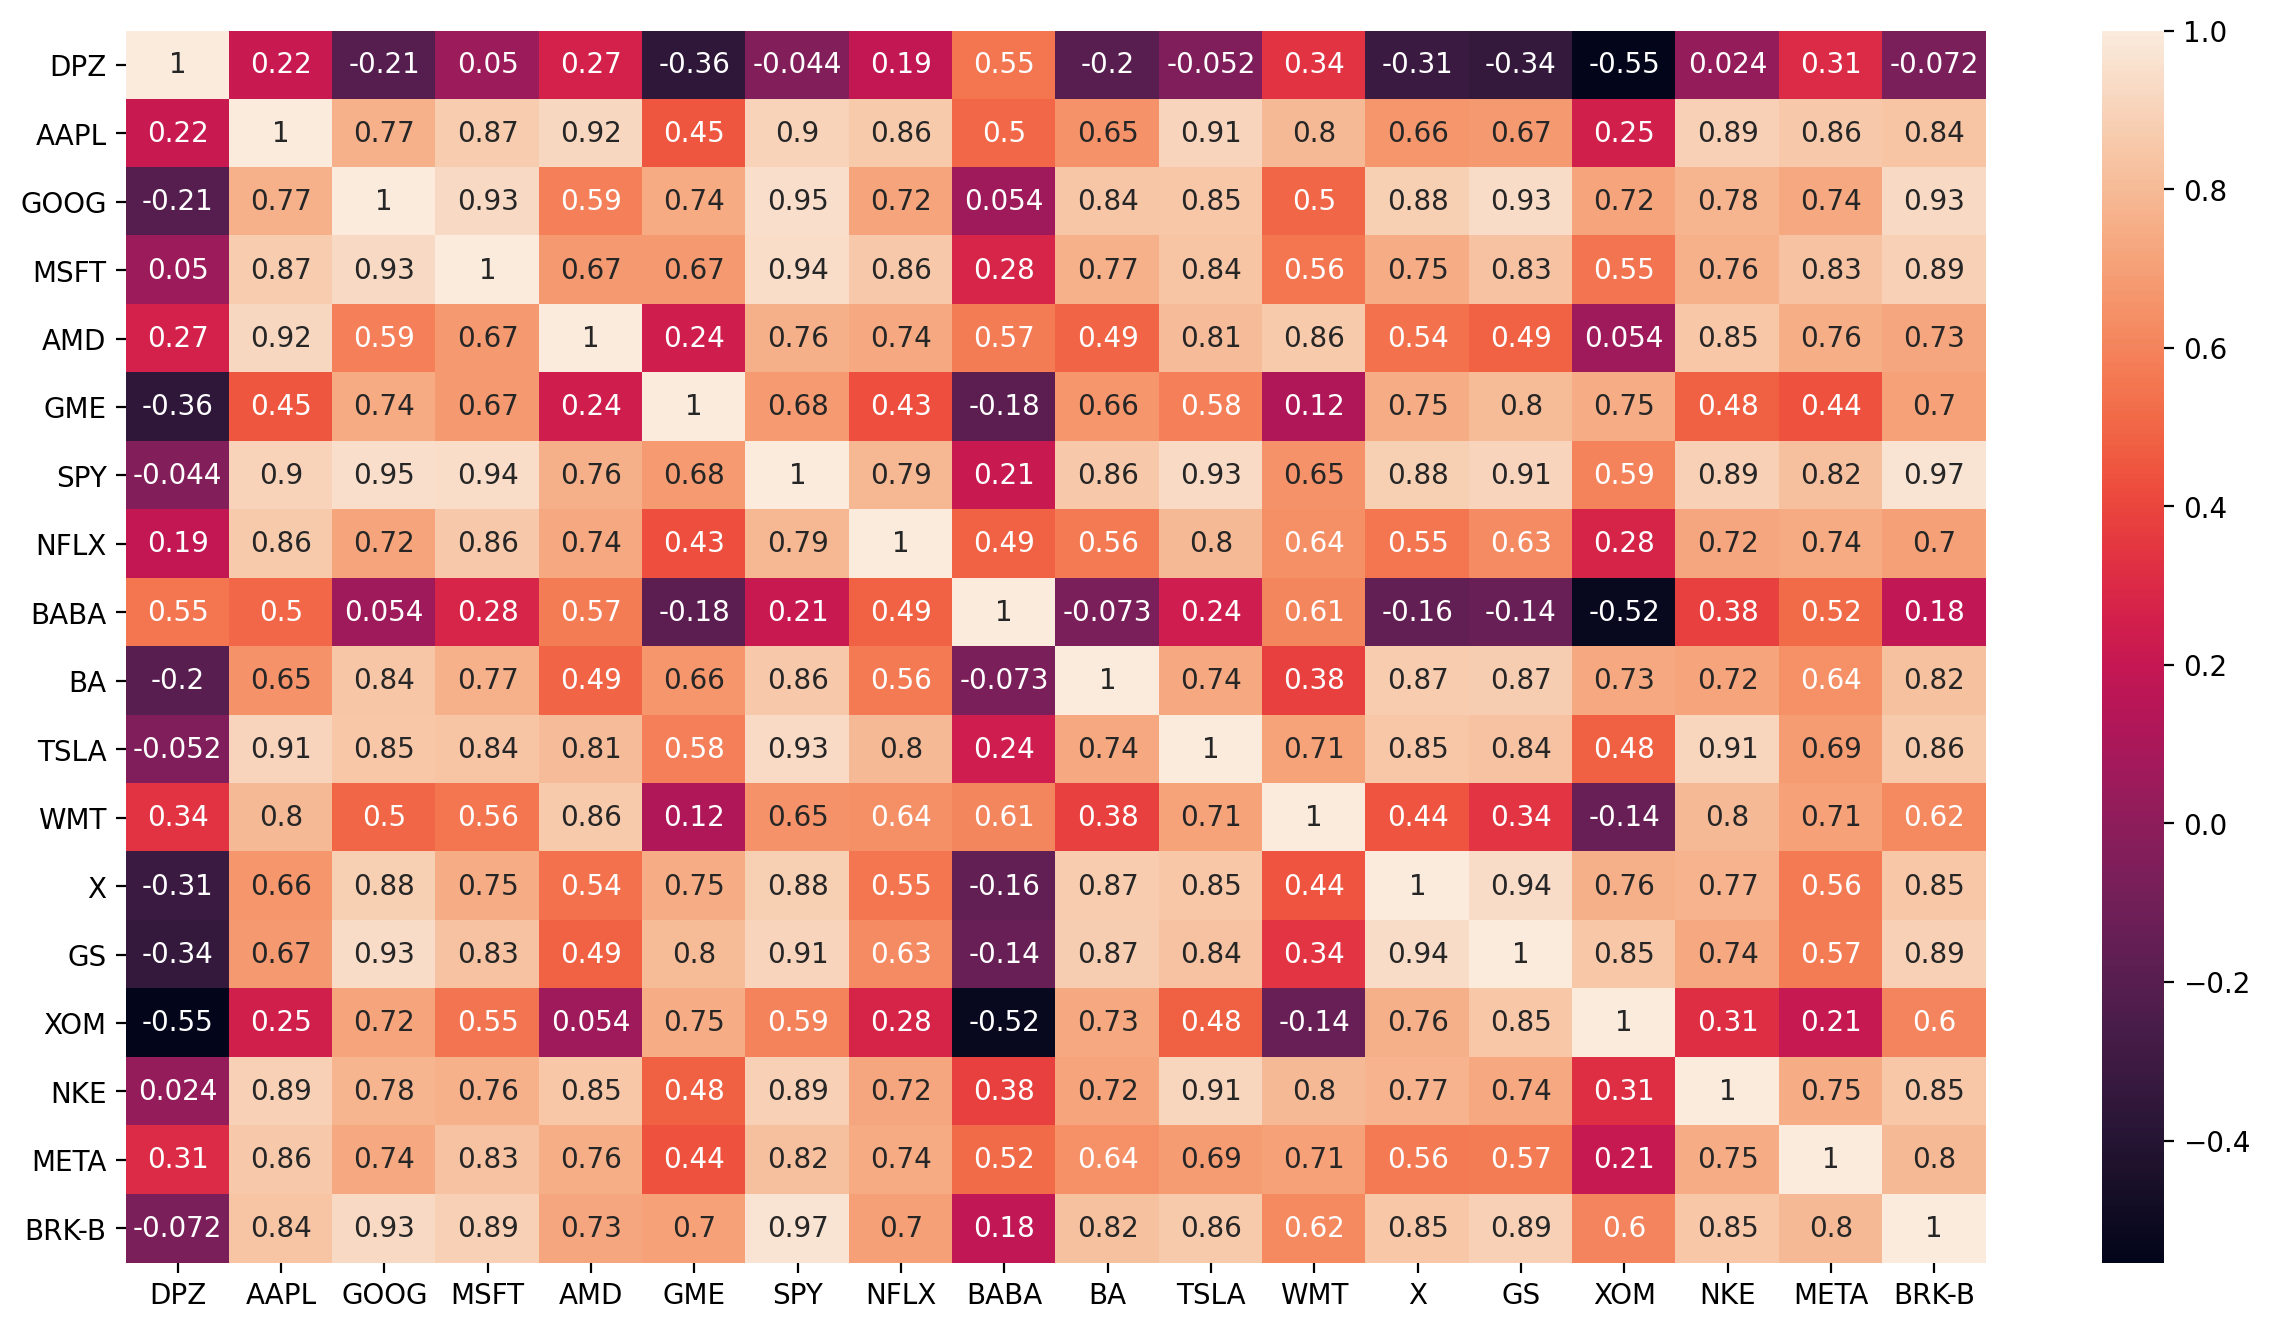

In [21]:
# Heat Matrix
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(15,8), dpi=200)
sn.heatmap(corr_mtrx, annot=True)

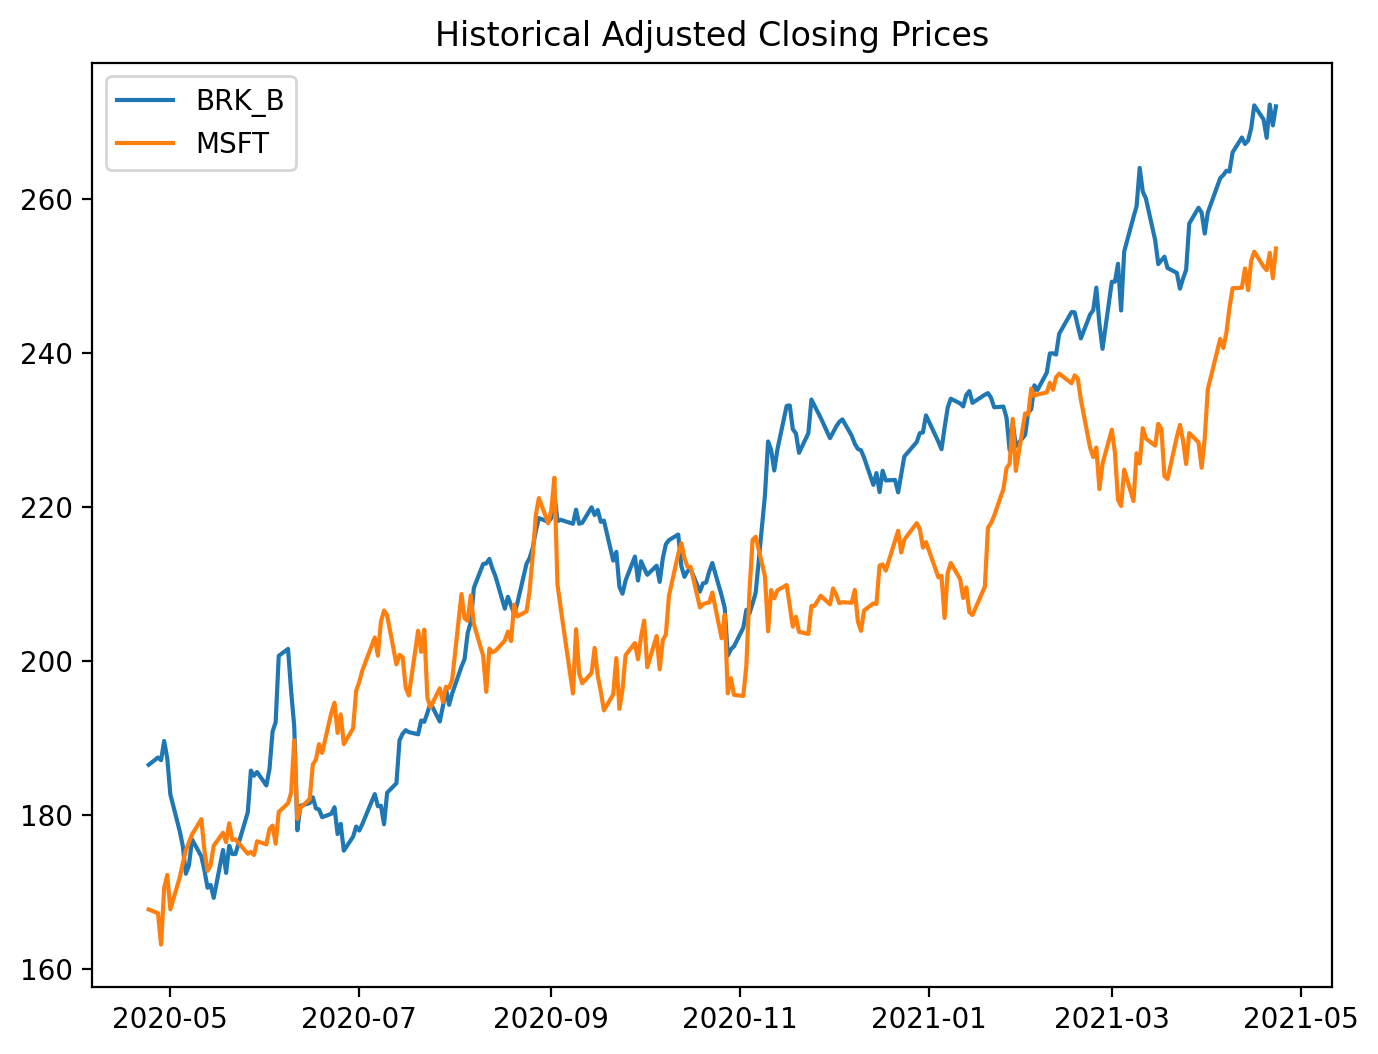

In [22]:
# Correlation of Nike and Apple ~ 0.89.
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B']
MSFT = d['MSFT']
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

Text(0.5, 1.0, 'Spread between Berkshire and Microsoft')

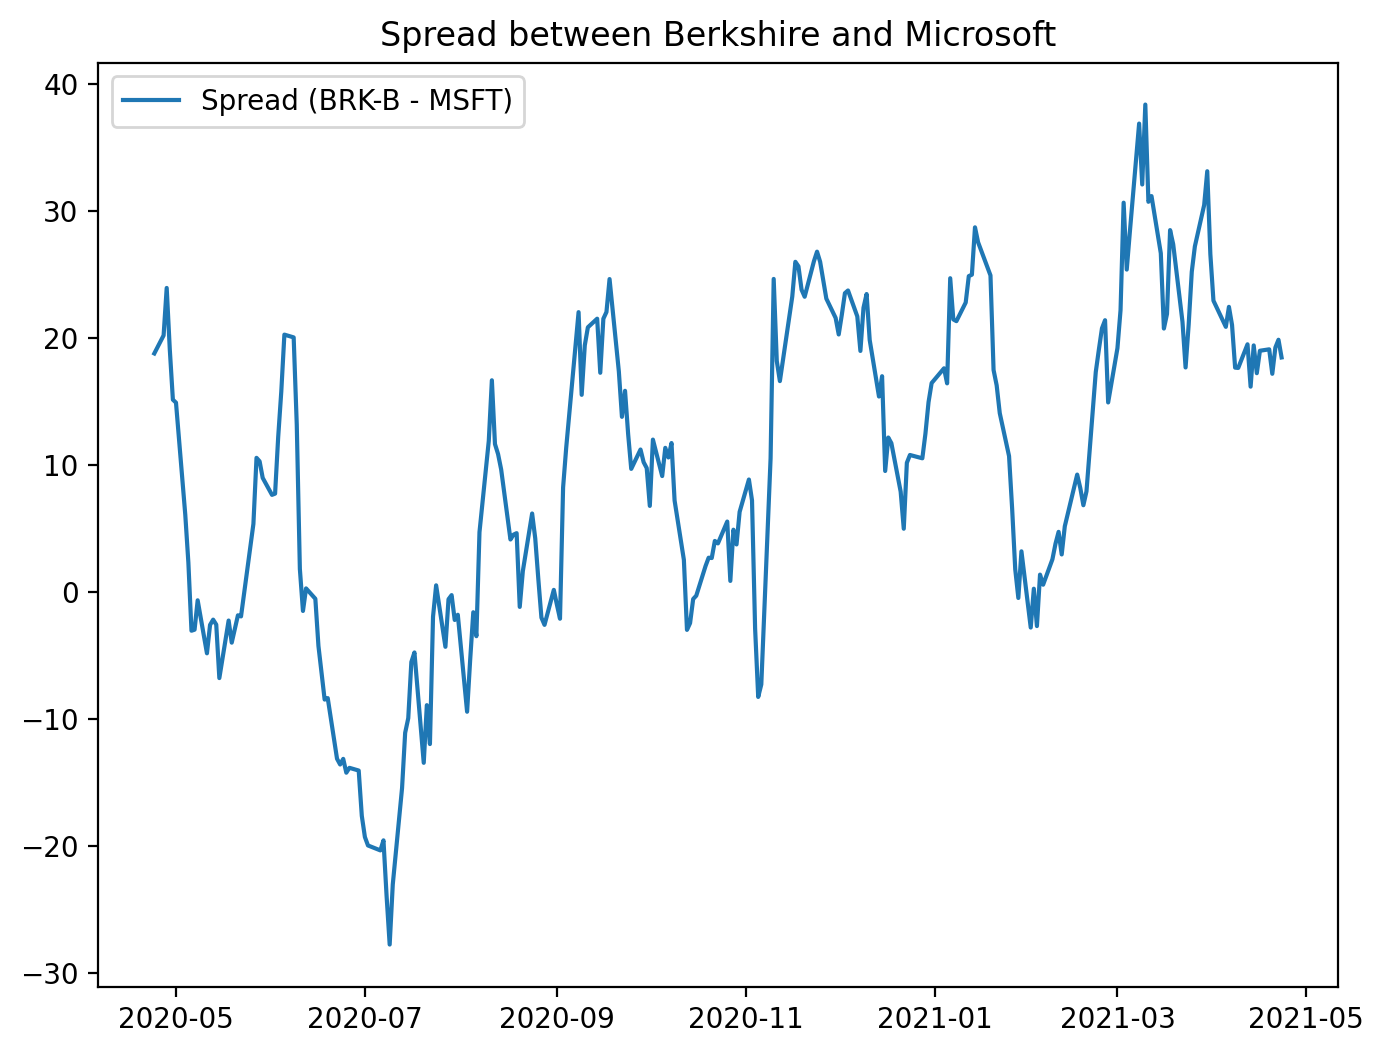

In [23]:
# Plot spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between Berkshire and Microsoft")

In [24]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)
print(result)

(-3.2313772567175296, 0.06483535284959425, array([-3.94060523, -3.36058133, -3.06139039]))


In [25]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.06483535284959425


In [26]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# We want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])


P value for the Augmented Dickey-Fuller Test is 0.9078709187914529
P value for the Augmented Dickey-Fuller Test is 0.7145863278304503
P value for the Augmented Dickey-Fuller Test is 0.06035855422982703
P value for the Augmented Dickey-Fuller Test is 0.03200770660359949


Text(0.5, 1.0, 'Price ratio between BRK and MSFT')

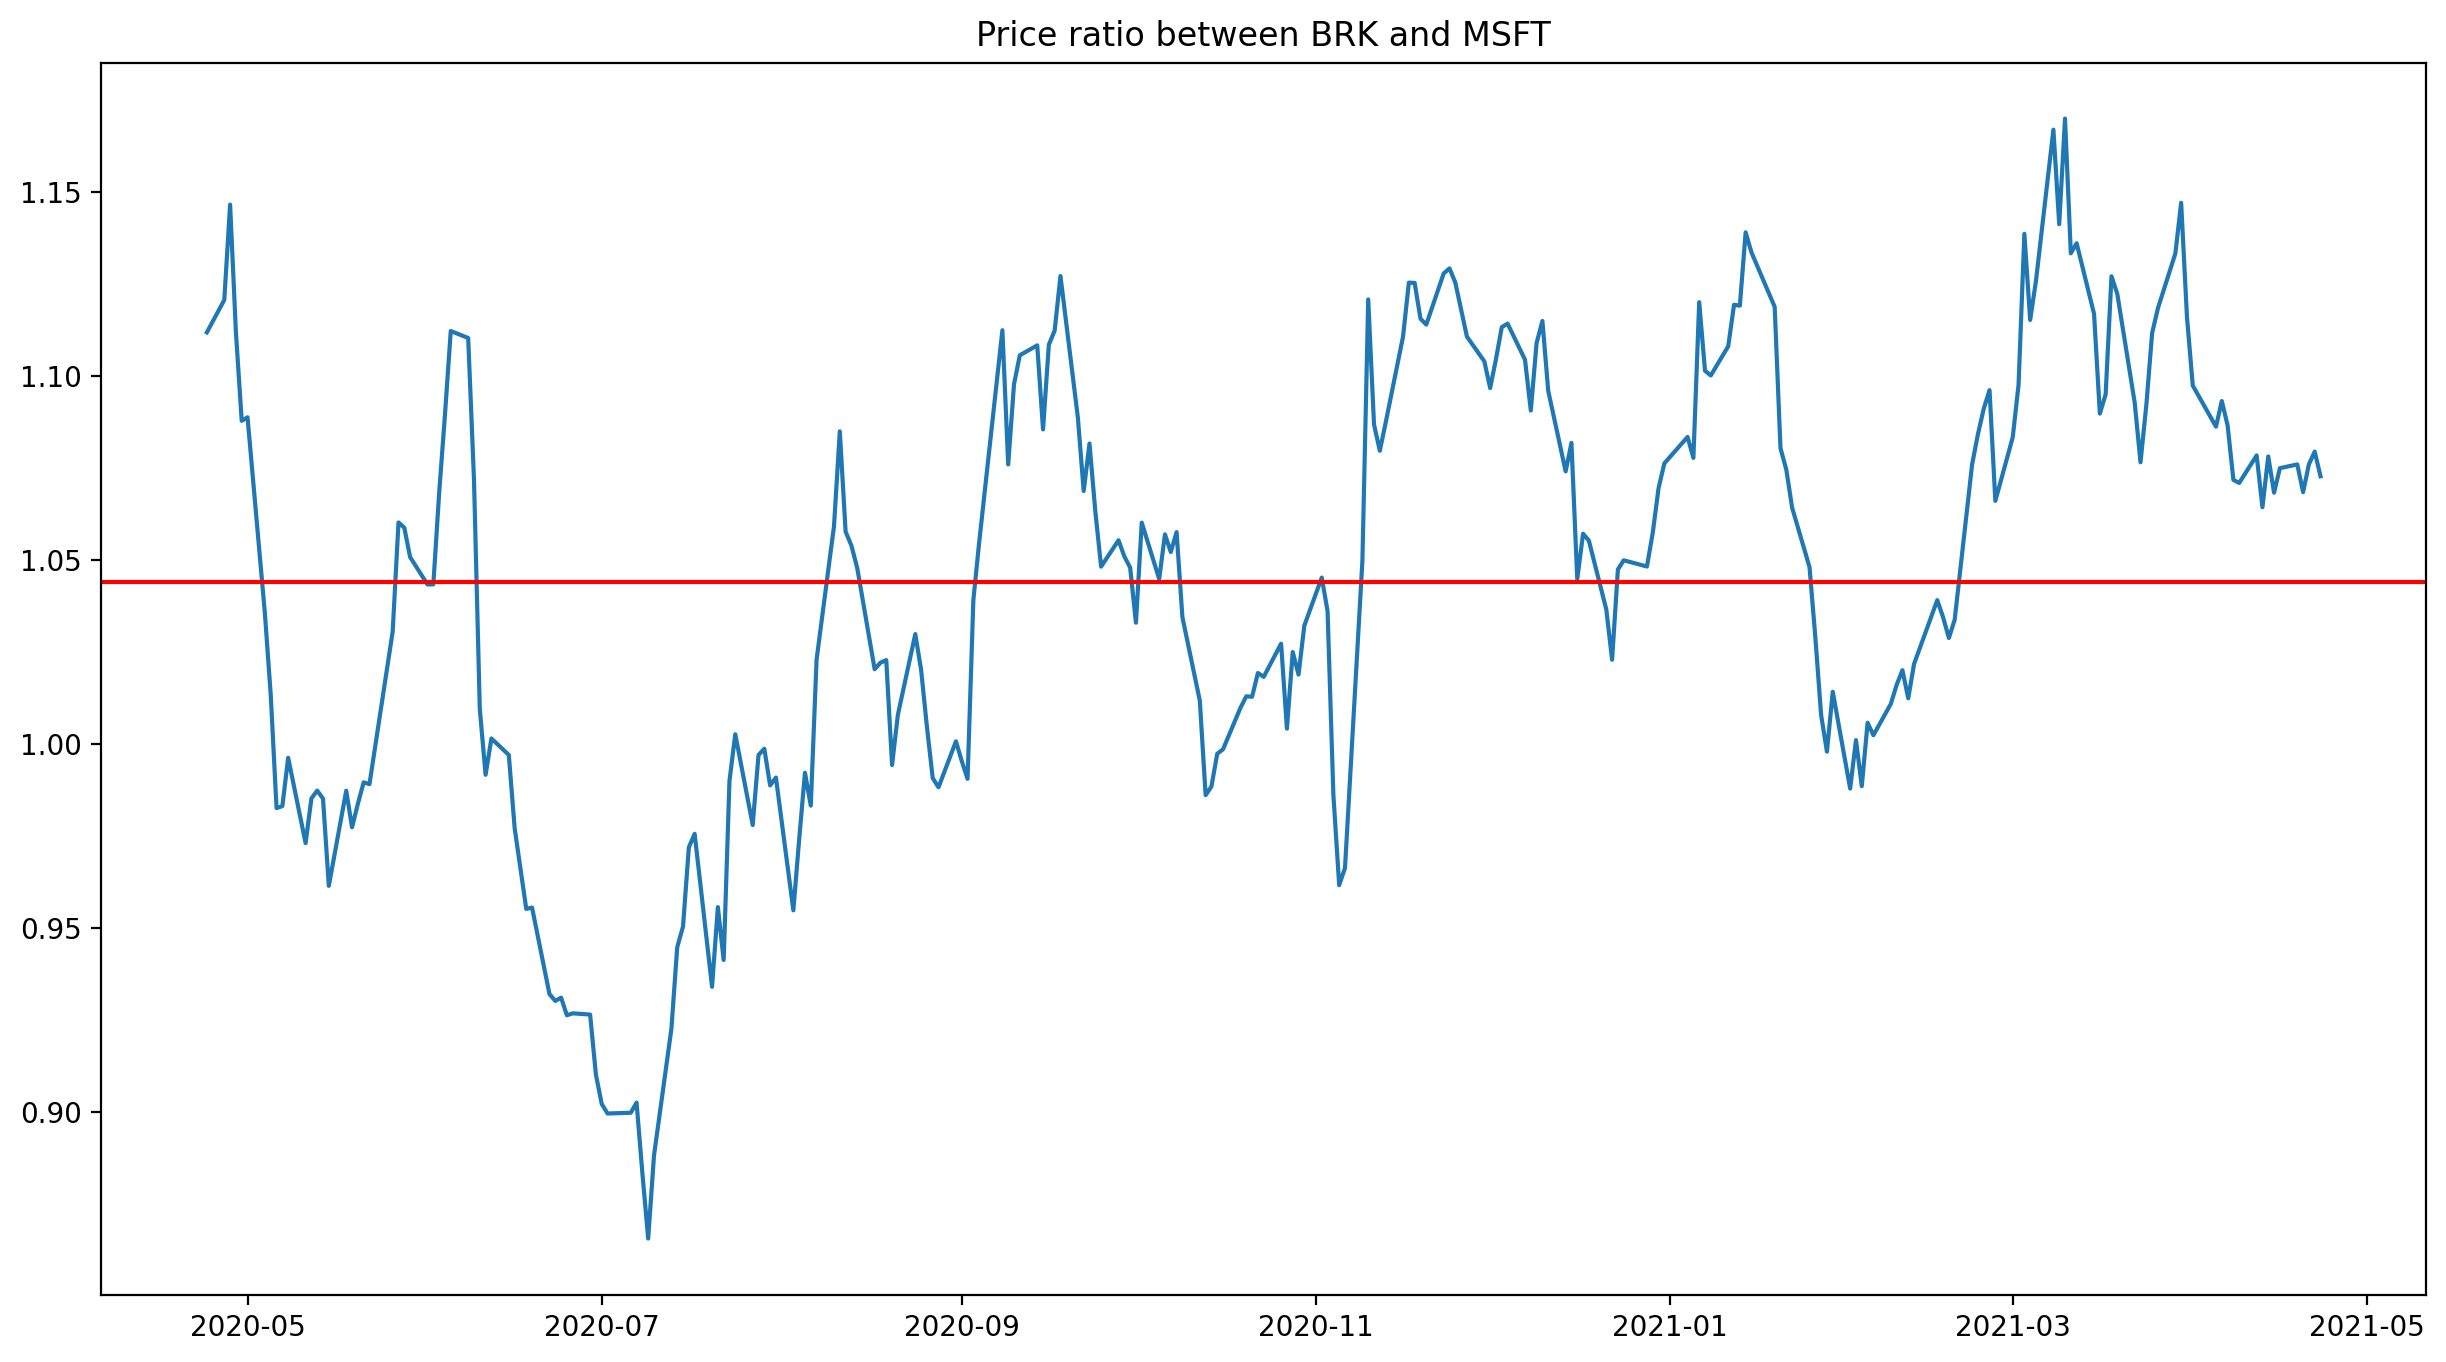

In [27]:
#Look at the price ratios between the two time series.
figure(figsize=(15, 8), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio')
plt.axhline(ratio.mean(), color = 'red')
plt.title('Price ratio between BRK and MSFT')

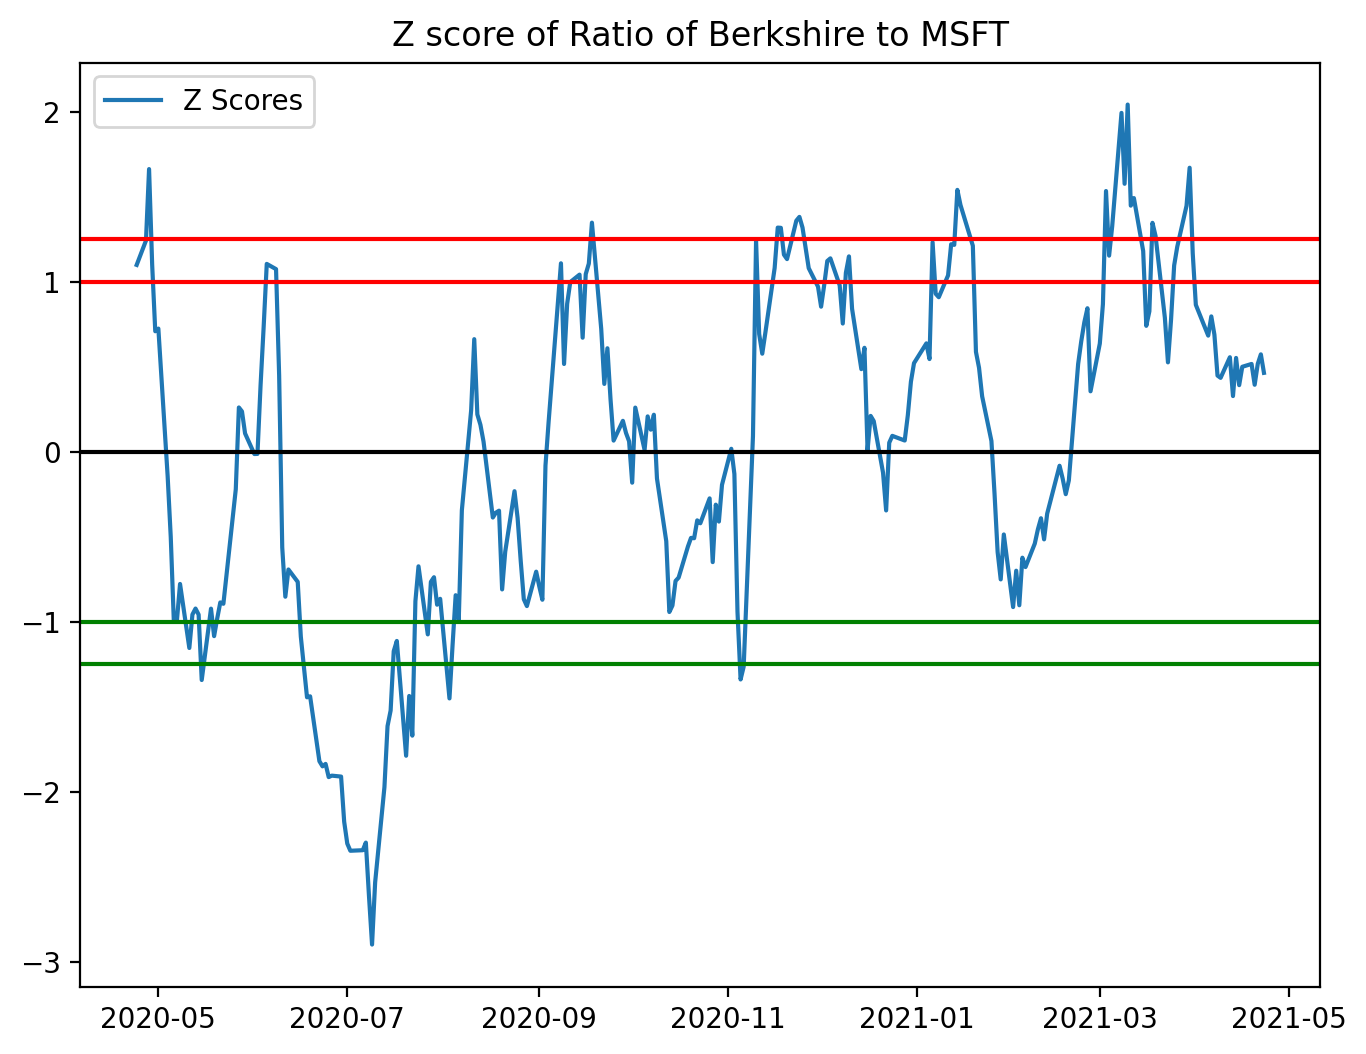

In [28]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [29]:
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# Machine Learning Model

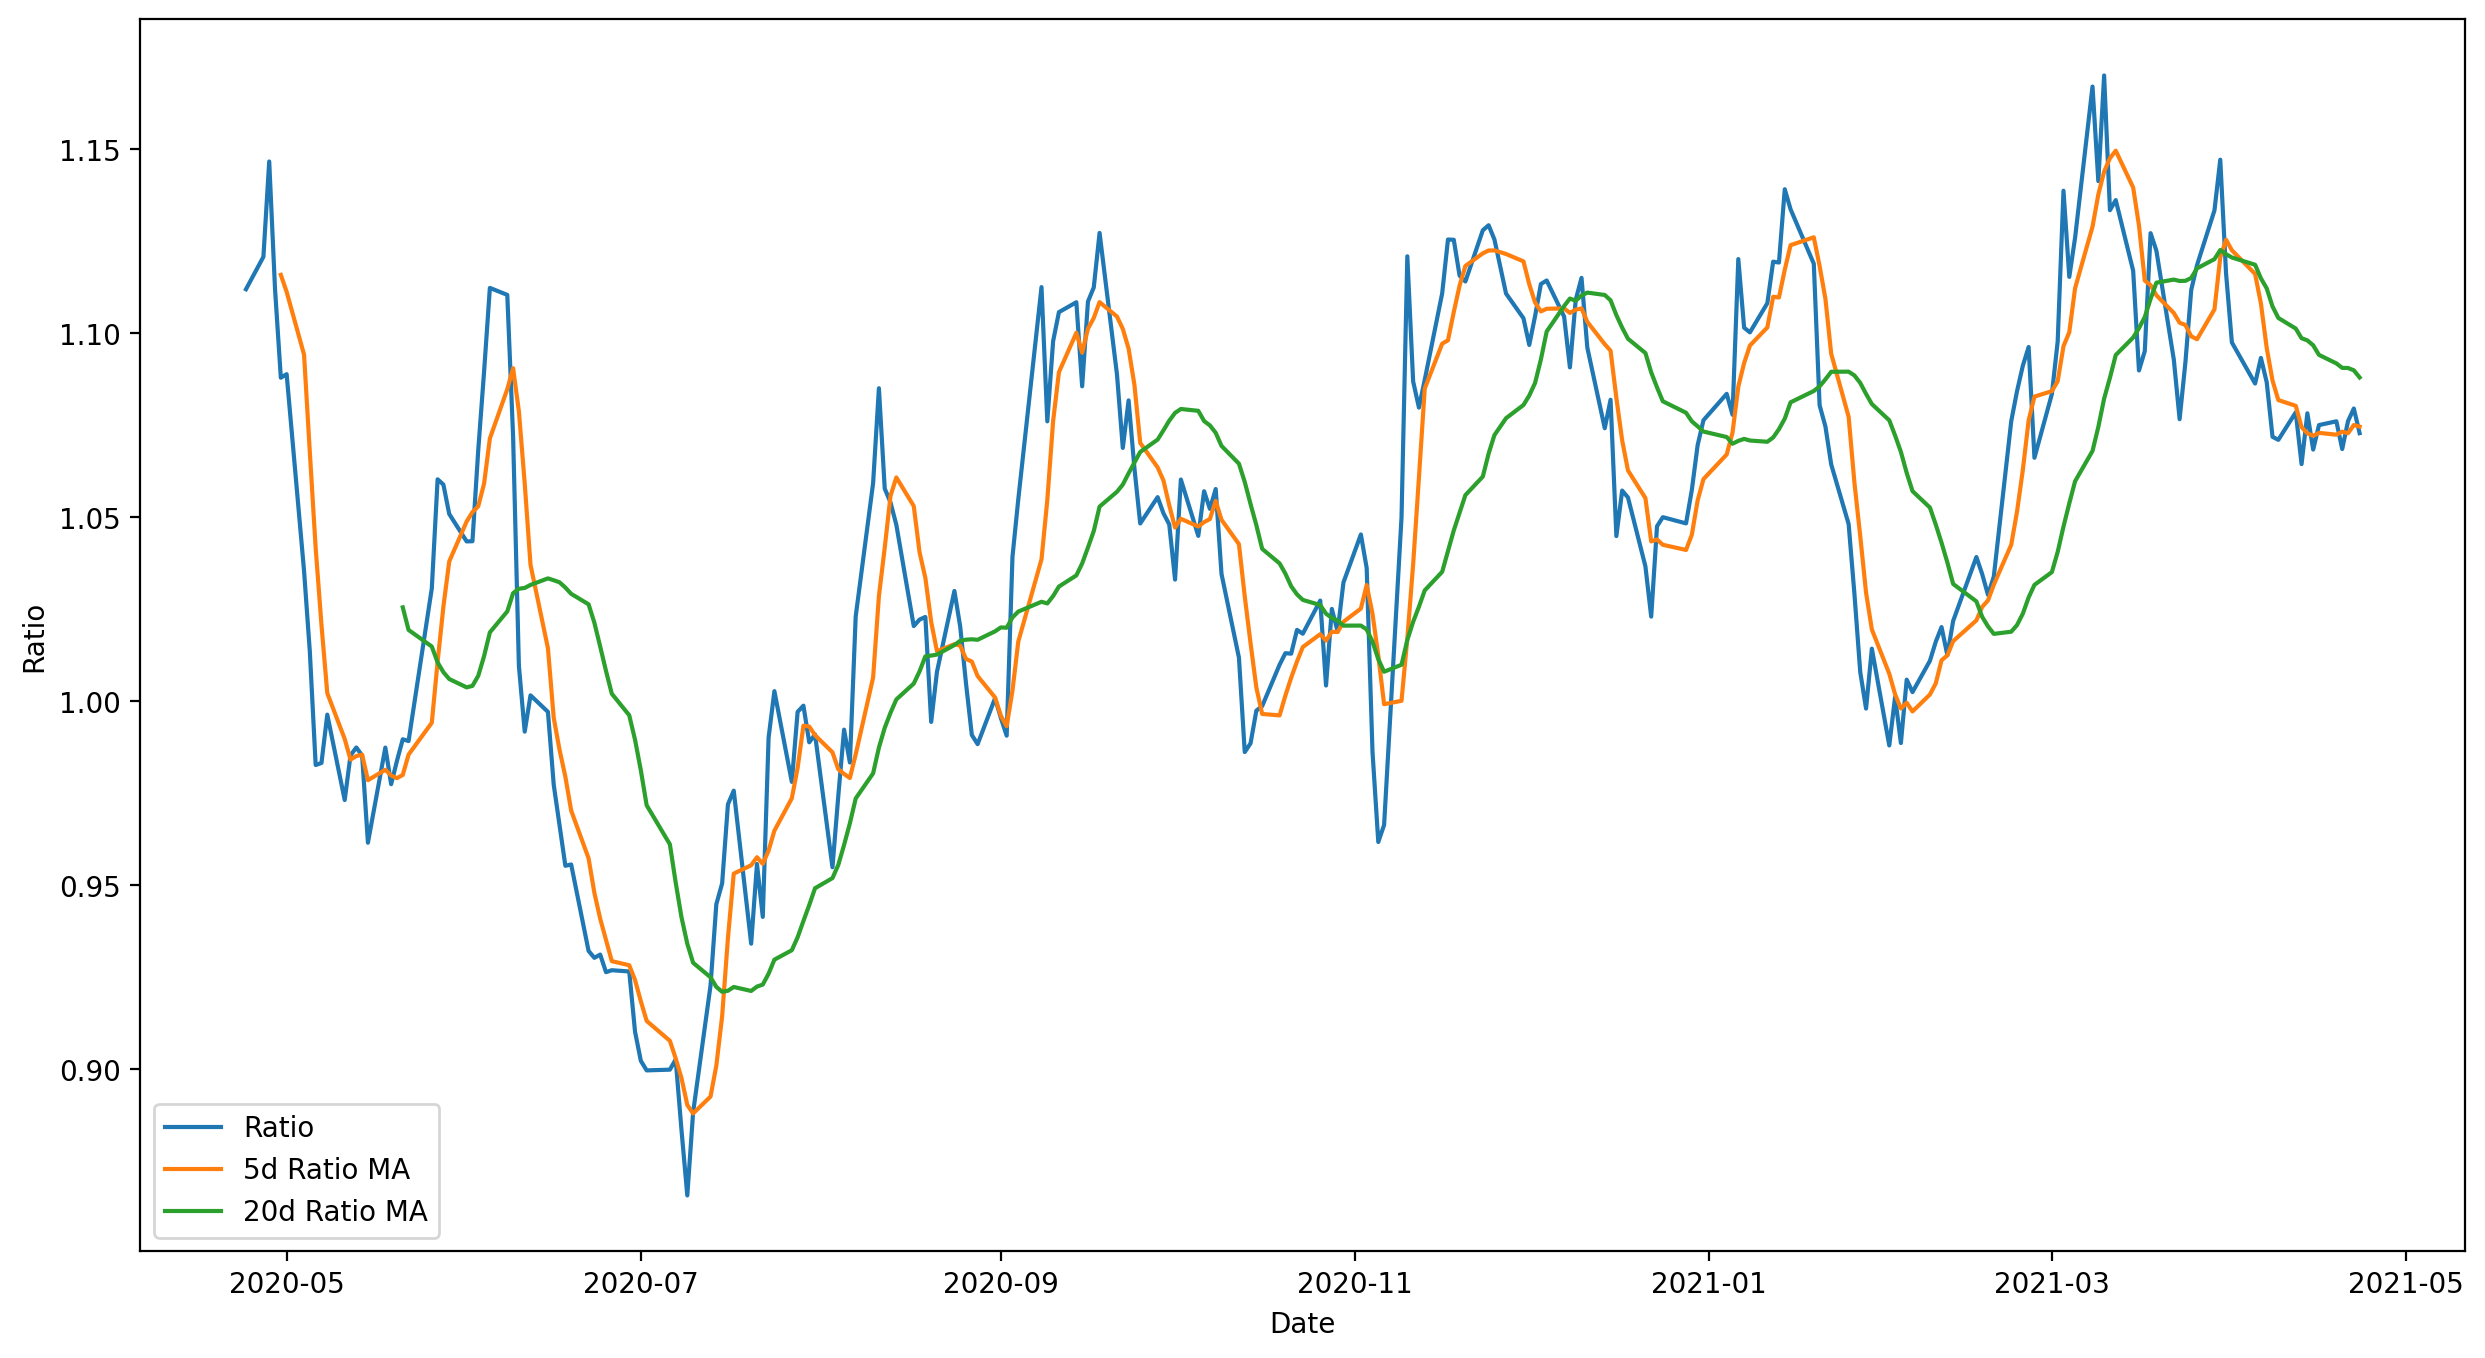

In [30]:
figure(figsize=(15, 8), dpi=200)
ratio_ma5 = ratio.rolling(window=5, center=False).mean()
ratio_ma20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore = (ratio_ma5 - ratio_ma20) / std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratio_ma5.index, ratio_ma5.values)
plt.plot(ratio_ma20.index, ratio_ma20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

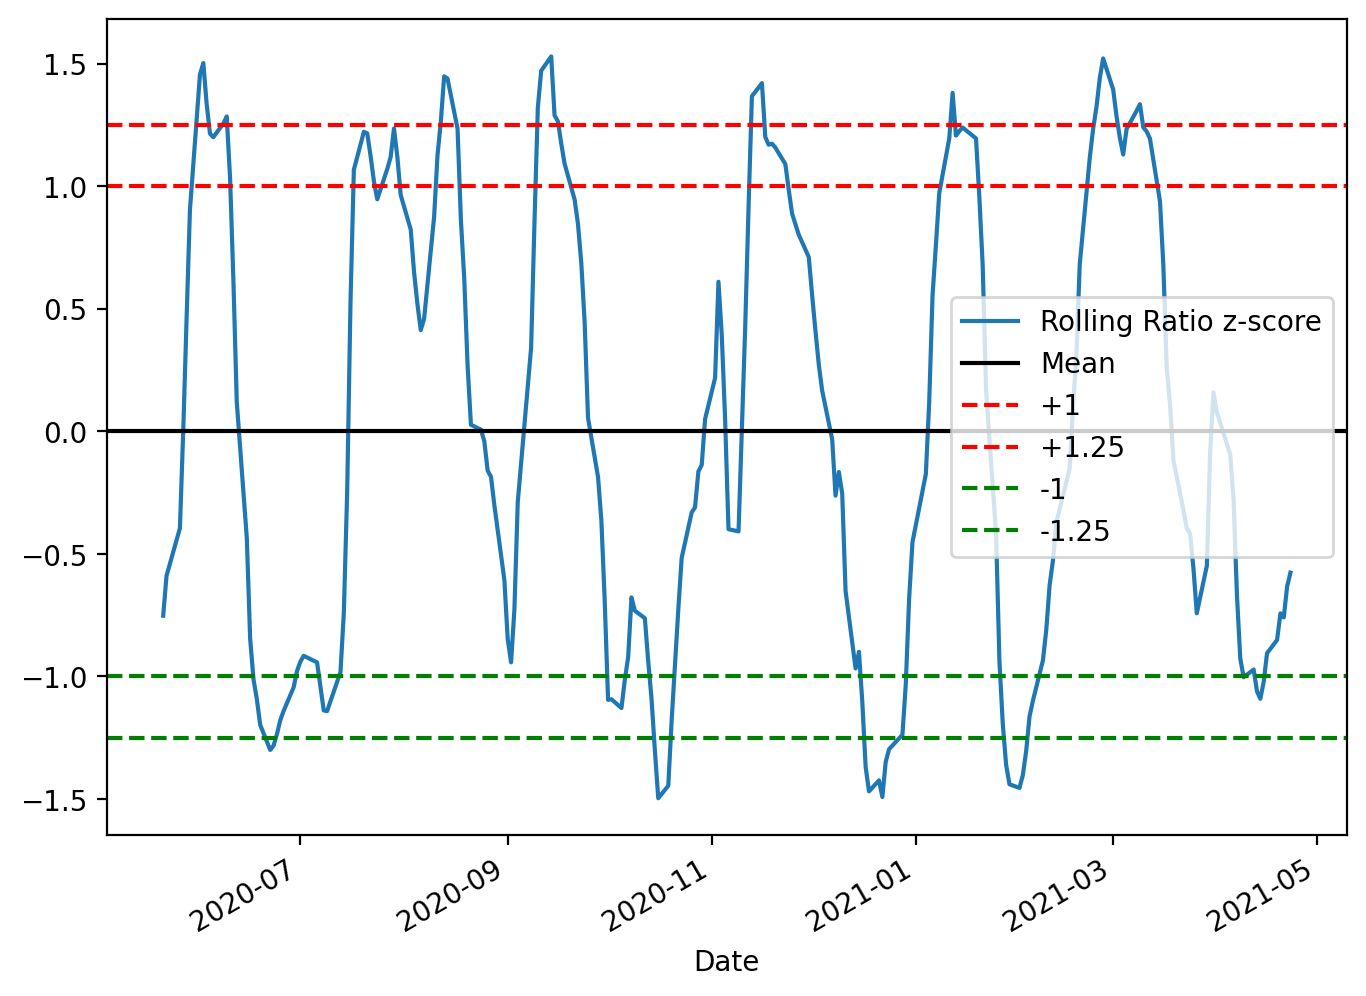

In [31]:
figure(figsize=(8, 6), dpi=200)
zscore.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

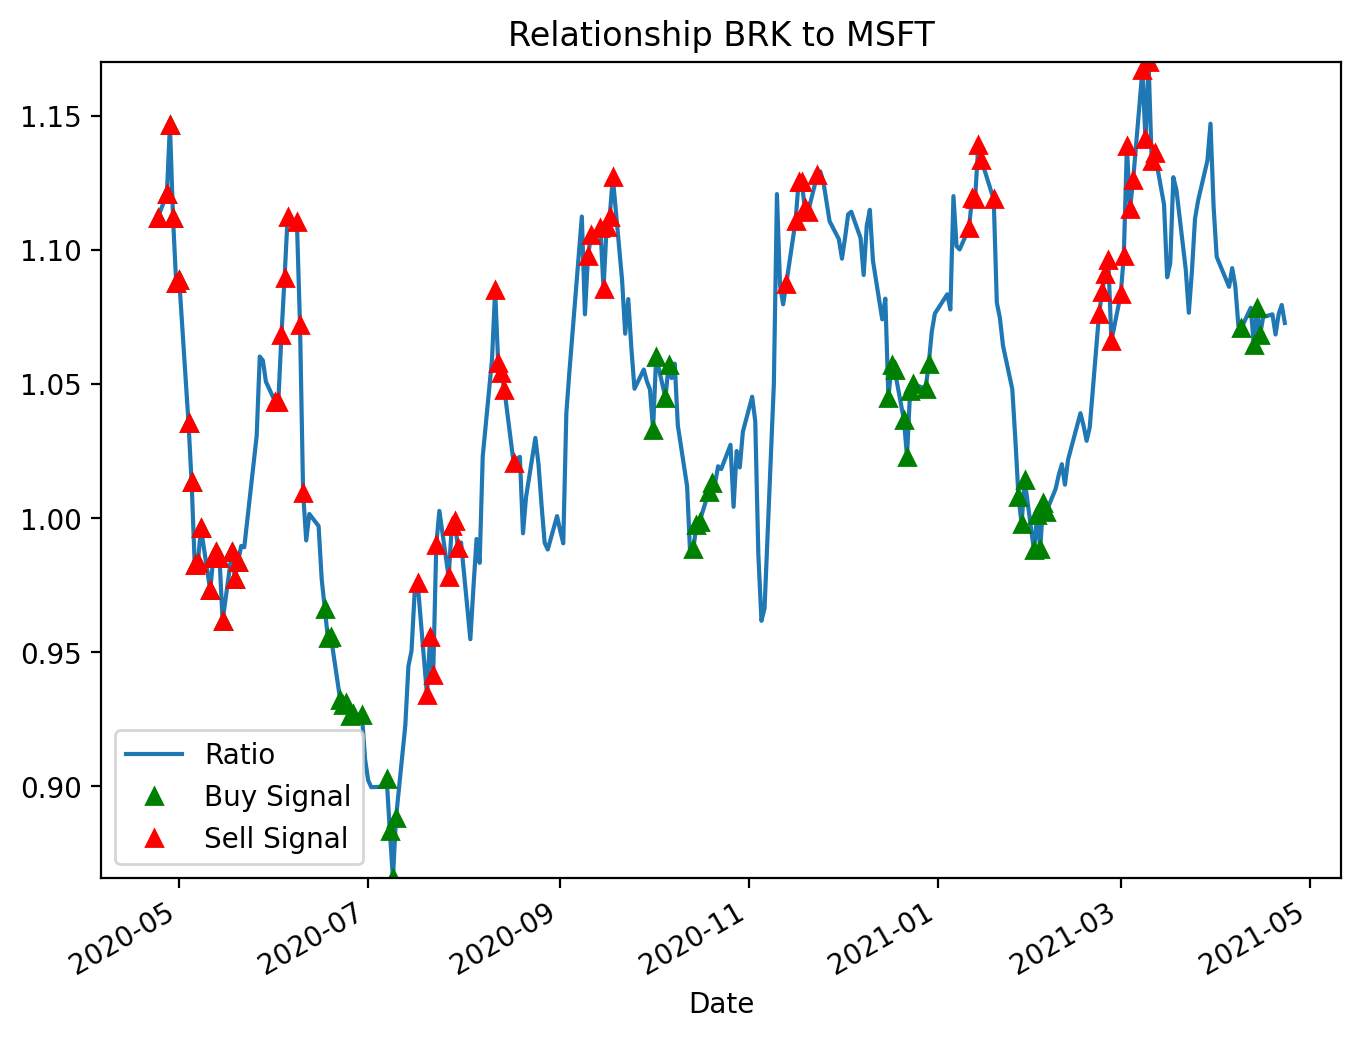

In [32]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore>-1] = 0
sell[zscore<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

In [47]:
import pandas as pd

# Initialize variables
position_size = 0  # Tracks number of positions (positive for long, negative for short)
avg_cost_BRK_B = 0  # Average cost of BRK-B
avg_cost_MSFT = 0  # Average cost of MSFT
percentage_gains = []  # Store percentage gains for each trade

# Backtest loop
for date, row in data.iterrows():
    buy_signal = row['buy']
    sell_signal = row['sell']
    price_BRK_B = row['BRK_B']
    price_MSFT = row['MSFT']

    if buy_signal > 0:  # Buy signal
        if position_size < 0:  # If currently in a short position, exit it first
            # Calculate percentage gain for the short position
            percent_gain_BRK_B = (avg_cost_BRK_B - price_BRK_B) / avg_cost_BRK_B * 100
            percent_gain_MSFT = (price_MSFT - avg_cost_MSFT) / avg_cost_MSFT * 100
            total_percent_gain = percent_gain_BRK_B + percent_gain_MSFT
            percentage_gains.append(total_percent_gain)  # Record the trade's percentage gain

            # Reset position
            position_size = 0
            avg_cost_BRK_B = 0
            avg_cost_MSFT = 0

        # Add to long position
        position_size += 1
        avg_cost_BRK_B = ((position_size - 1) * avg_cost_BRK_B + price_BRK_B) / position_size
        avg_cost_MSFT = ((position_size - 1) * avg_cost_MSFT + price_MSFT) / position_size

    elif sell_signal > 0:  # Sell signal
        if position_size > 0:  # If currently in a long position, exit it first
            # Calculate percentage gain for the long position
            percent_gain_BRK_B = (price_BRK_B - avg_cost_BRK_B) / avg_cost_BRK_B * 100
            percent_gain_MSFT = (avg_cost_MSFT - price_MSFT) / avg_cost_MSFT * 100
            total_percent_gain = percent_gain_BRK_B + percent_gain_MSFT
            percentage_gains.append(total_percent_gain)  # Record the trade's percentage gain

            # Reset position
            position_size = 0
            avg_cost_BRK_B = 0
            avg_cost_MSFT = 0

        # Add to short position
        position_size -= 1
        avg_cost_BRK_B = ((abs(position_size) - 1) * avg_cost_BRK_B + price_BRK_B) / abs(position_size)
        avg_cost_MSFT = ((abs(position_size) - 1) * avg_cost_MSFT + price_MSFT) / abs(position_size)

# Summarize the results
total_percentage_gain = sum(percentage_gains)

# Output the results
print("Trade Percentage Gains:", percentage_gains)
print("Total Percentage Gain:", total_percentage_gain)


Trade Percentage Gains: [1.721054592466296, 9.91375000630267, 5.9080062707232965, 0.336807327037703, 6.484117493775267, 6.489555348917769, 5.75848534366464, 11.092244242530471, 7.413653638093615, 4.3162061976233765]
Total Percentage Gain: 59.433880461135104
